C:\Users\andil\AppData\Local\Temp\ipykernel_15408\1833874770.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pocket_alias'].fillna('Not Available', inplace=True)


Summary statistics for 'ward_id':
count    4.340000e+02
mean     1.910006e+07
std      3.102414e+01
min      1.910000e+07
25%      1.910004e+07
50%      1.910007e+07
75%      1.910009e+07
max      1.910011e+07
Name: ward_id, dtype: float64

Value counts for 'is_cluster':
is_cluster
Crossroads Infills       22
Site C Infills           19
Browns Farm Infills      17
KTC Infills              16
Samora Machel Infills    16
                         ..
Kansite                   1
Kat Se Kamp               1
Klein Zoute Rivier        1
Klipfontein Glebe         1
Zola Section              1
Name: count, Length: 202, dtype: int64


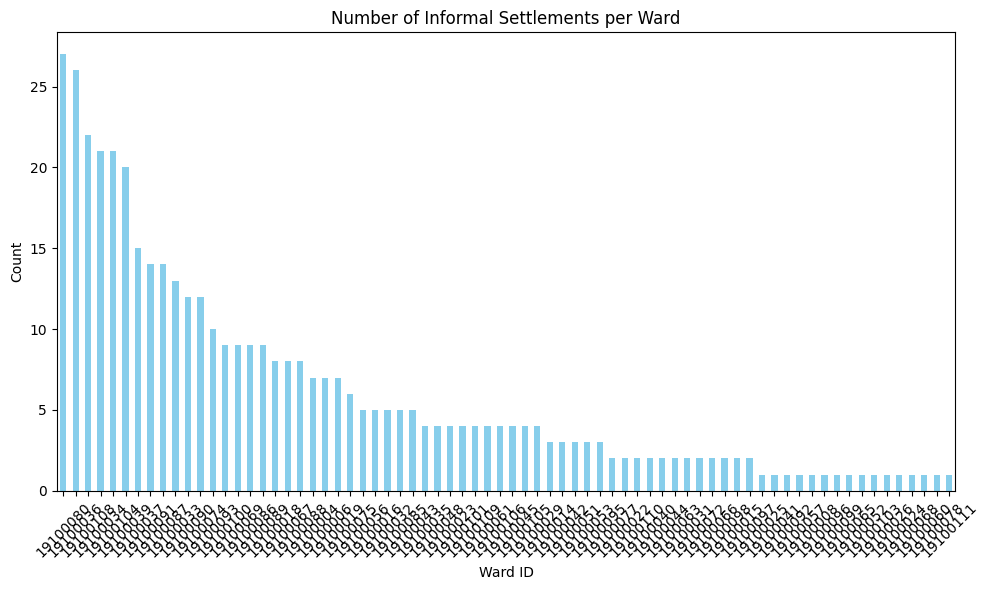

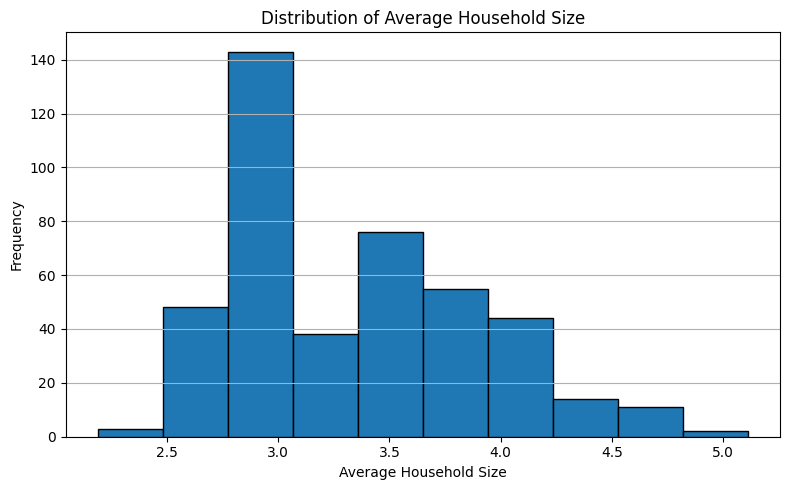

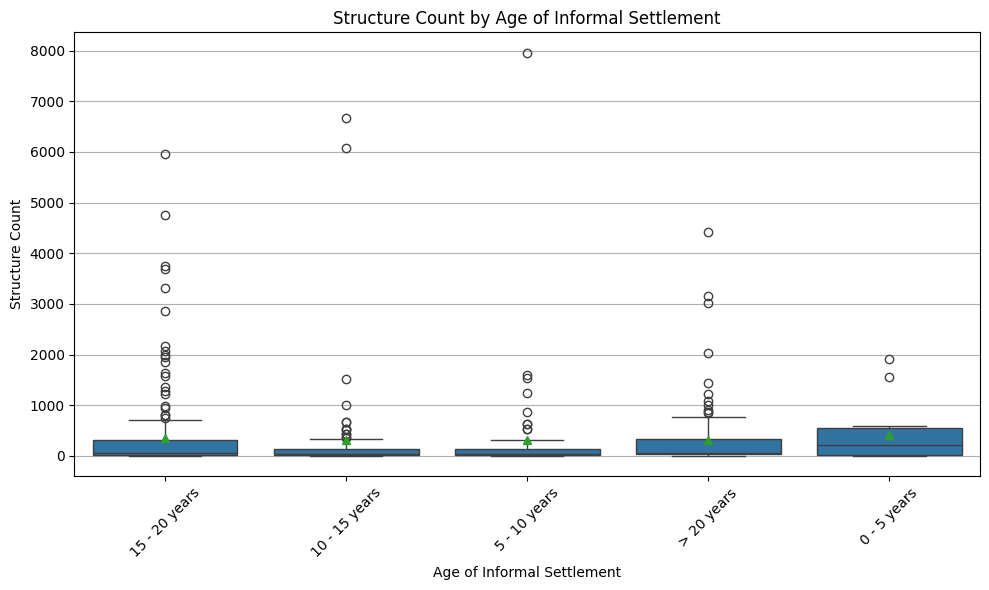

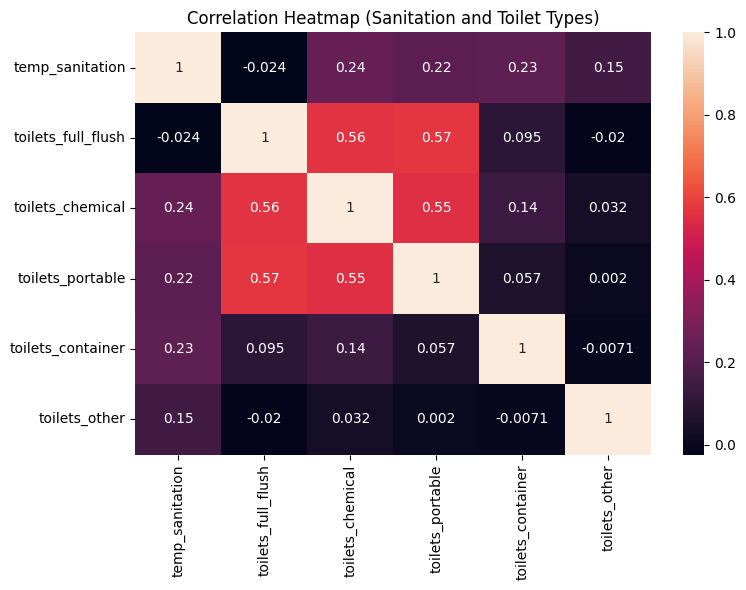

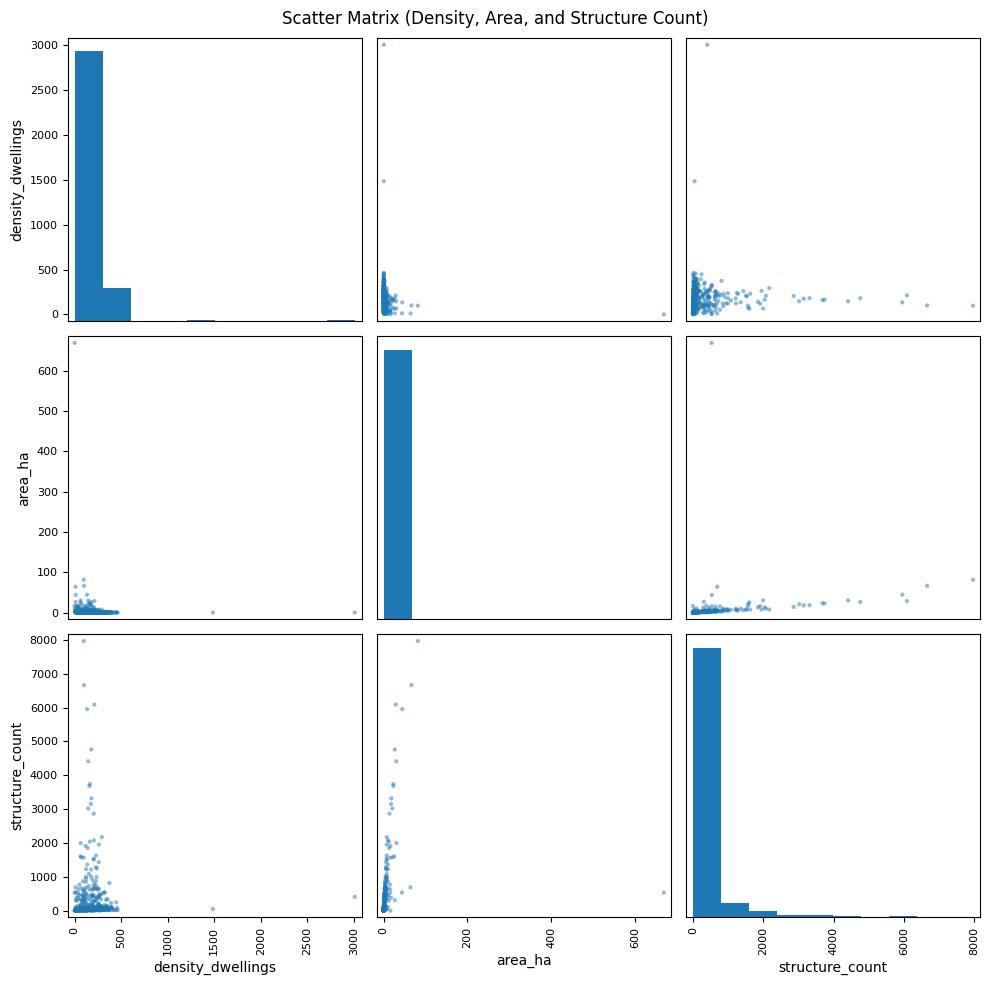

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

data_path = 'Informal Settlement Matrix.csv.csv'

# Read the CSV data into a DataFrame
df = pd.read_csv(data_path)

# Handle Missing Values (Address at least some missing values)

df['pocket_alias'].fillna('Not Available', inplace=True)


# Summary Statistics (Example - ward_id)
ward_id_stats = df['ward_id'].describe()
print(f"Summary statistics for 'ward_id':\n{ward_id_stats}")


# Categorical Data Exploration (Example - 'is_cluster')
is_cluster_value_counts = df['is_cluster'].value_counts()
print(f"\nValue counts for 'is_cluster':\n{is_cluster_value_counts}")



# Charts and Graphs

# 1. Bar Chart (Number of settlements per ward)
ward_settlement_counts = df['ward_id'].value_counts()
plt.figure(figsize=(10, 6))
ward_settlement_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Informal Settlements per Ward')
plt.xlabel('Ward ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Histogram (Distribution of average household size)
plt.figure(figsize=(8, 5))
plt.hist(df['avg_hhsize'], bins=10, edgecolor='black')
plt.title('Distribution of Average Household Size')
plt.xlabel('Average Household Size')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 3. Box Plot (Comparing structure count by age of settlement)
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='age_of_is',
    y='structure_count',
    showmeans=True,
    data=df
)
plt.title('Structure Count by Age of Informal Settlement')
plt.xlabel('Age of Informal Settlement')
plt.ylabel('Structure Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 4. Heatmap (Correlations between sanitation and toilet types)
sanitation_columns = ['temp_sanitation', 'toilets_full_flush', 'toilets_chemical', 'toilets_portable', 'toilets_container', 'toilets_other']
correlation = df[sanitation_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True)
plt.title('Correlation Heatmap (Sanitation and Toilet Types)')
plt.tight_layout()
plt.show()

# 5. Scatter Matrix (Relationships between density, area, and structure count)
numerical_columns = ['density_dwellings', 'area_ha', 'structure_count']
scatter_matrix(df[numerical_columns], figsize=(10, 10), diagonal='hist')
plt.suptitle('Scatter Matrix (Density, Area, and Structure Count)')
plt.tight_layout()
plt.show()
